# Explore here

In [88]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [89]:
total_data.shape

(1338, 7)

In [90]:
total_data.iloc[1]

age                18
sex              male
bmi             33.77
children            1
smoker             no
region      southeast
charges     1725.5523
Name: 1, dtype: object

In [91]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [92]:
total_data.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [93]:
print(f"Dimensions before dropping duplicates: {total_data.shape}")

total_data = total_data.drop_duplicates()

print(f"Dimensions after dropping duplicates: {total_data.shape}")

Dimensions before dropping duplicates: (1338, 7)
Dimensions after dropping duplicates: (1337, 7)


Categorical Var

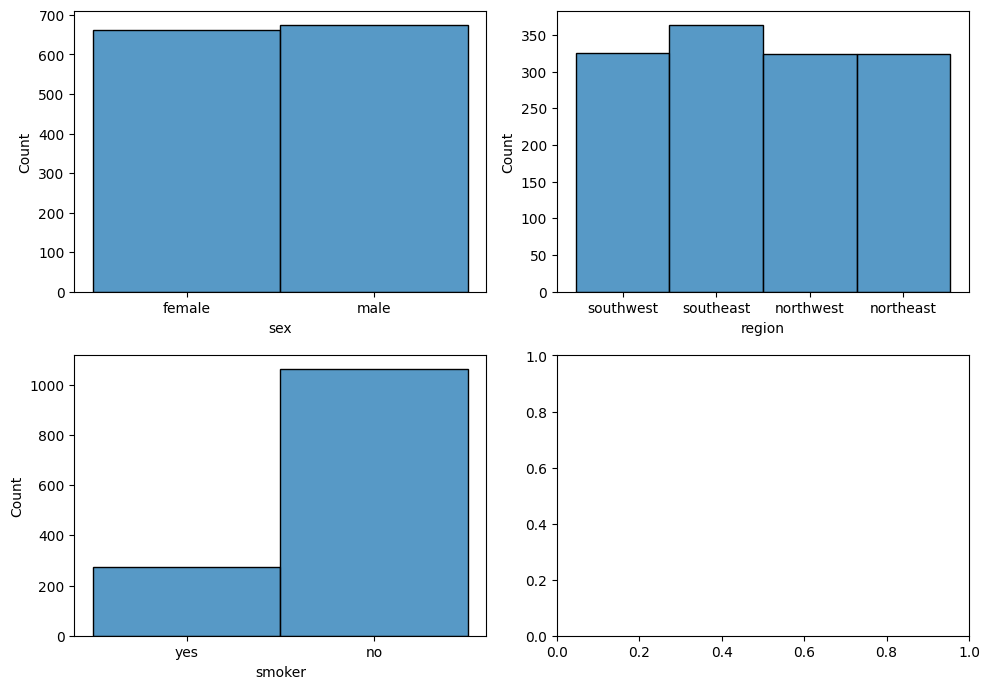

In [94]:

# Create subplots
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Creating a multiple figure with histograms for each categorical feature
sns.histplot(ax=axis[0, 0], data=total_data, x="sex")
sns.histplot(ax=axis[1, 0], data=total_data, x="smoker")
sns.histplot(ax=axis[0, 1], data=total_data, x="region")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Numeric Var

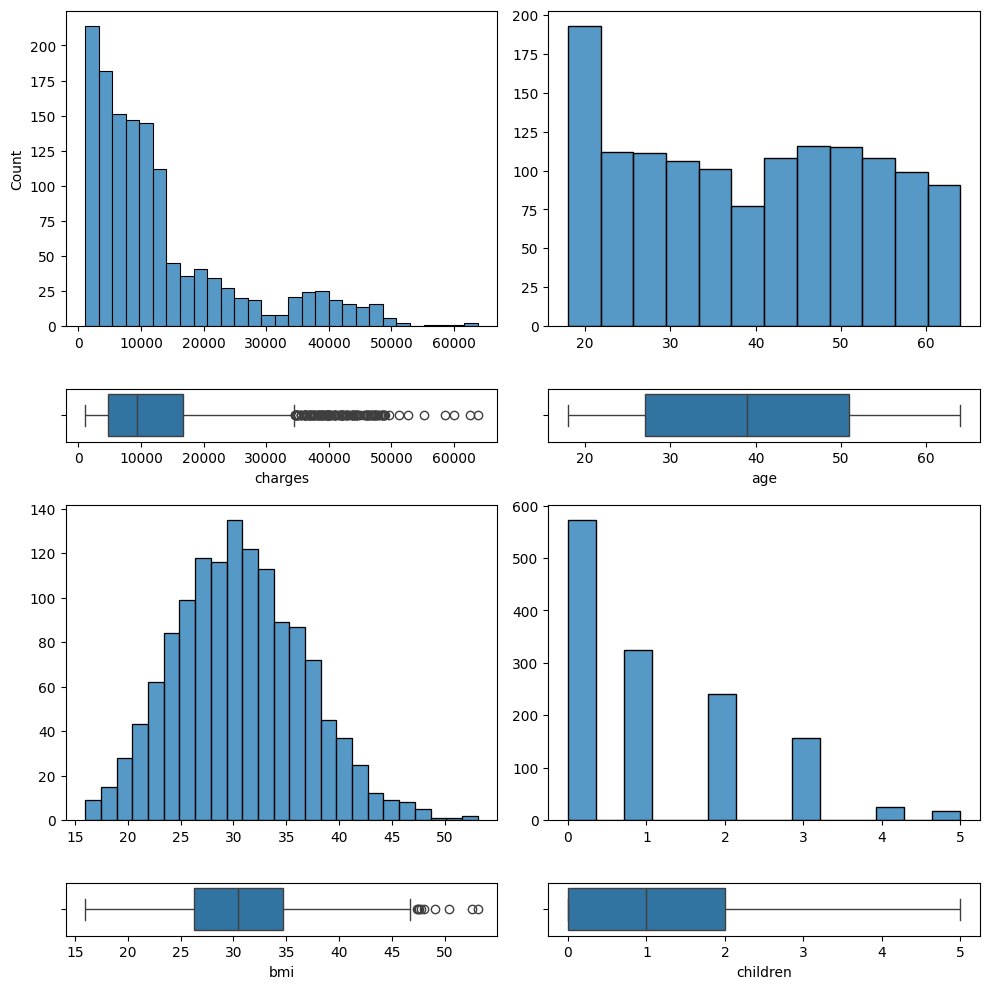

In [95]:

numerical_features = ['age', 'bmi', 'children', 'charges']

# Create subplots
fig, axis = plt.subplots(4, 2, figsize=(10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating histograms and box plots for each numerical feature
sns.histplot(ax=axis[0, 0], data=total_data, x="charges").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=total_data, x="charges")
sns.histplot(ax=axis[0, 1], data=total_data, x="age").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=total_data, x="age")

sns.histplot(ax=axis[2, 0], data=total_data, x="bmi").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 0], data=total_data, x="bmi")
sns.histplot(ax=axis[2, 1], data=total_data, x="children").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 1], data=total_data, x="children")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### Analysis:

1. **Age**:
   - The age distribution appears relatively uniform, but more people in their 20s.

2. **BMI (Body Mass Index)**:
   - The BMI distribution shows a roughly normal pattern, with outliers towards higher BMI values.

3. **Number of Children**:
   - Most individuals have fewer children, with a peak around 0 or 1.
   - Some outliers towards higher numbers of children.

4. **Insurance Charges**:
   - Insurance charges exhibit a highly right-skewed distribution, with a long right tail.
   - Outliers are noticeable towards higher insurance charges.

### Numerical - Numerical

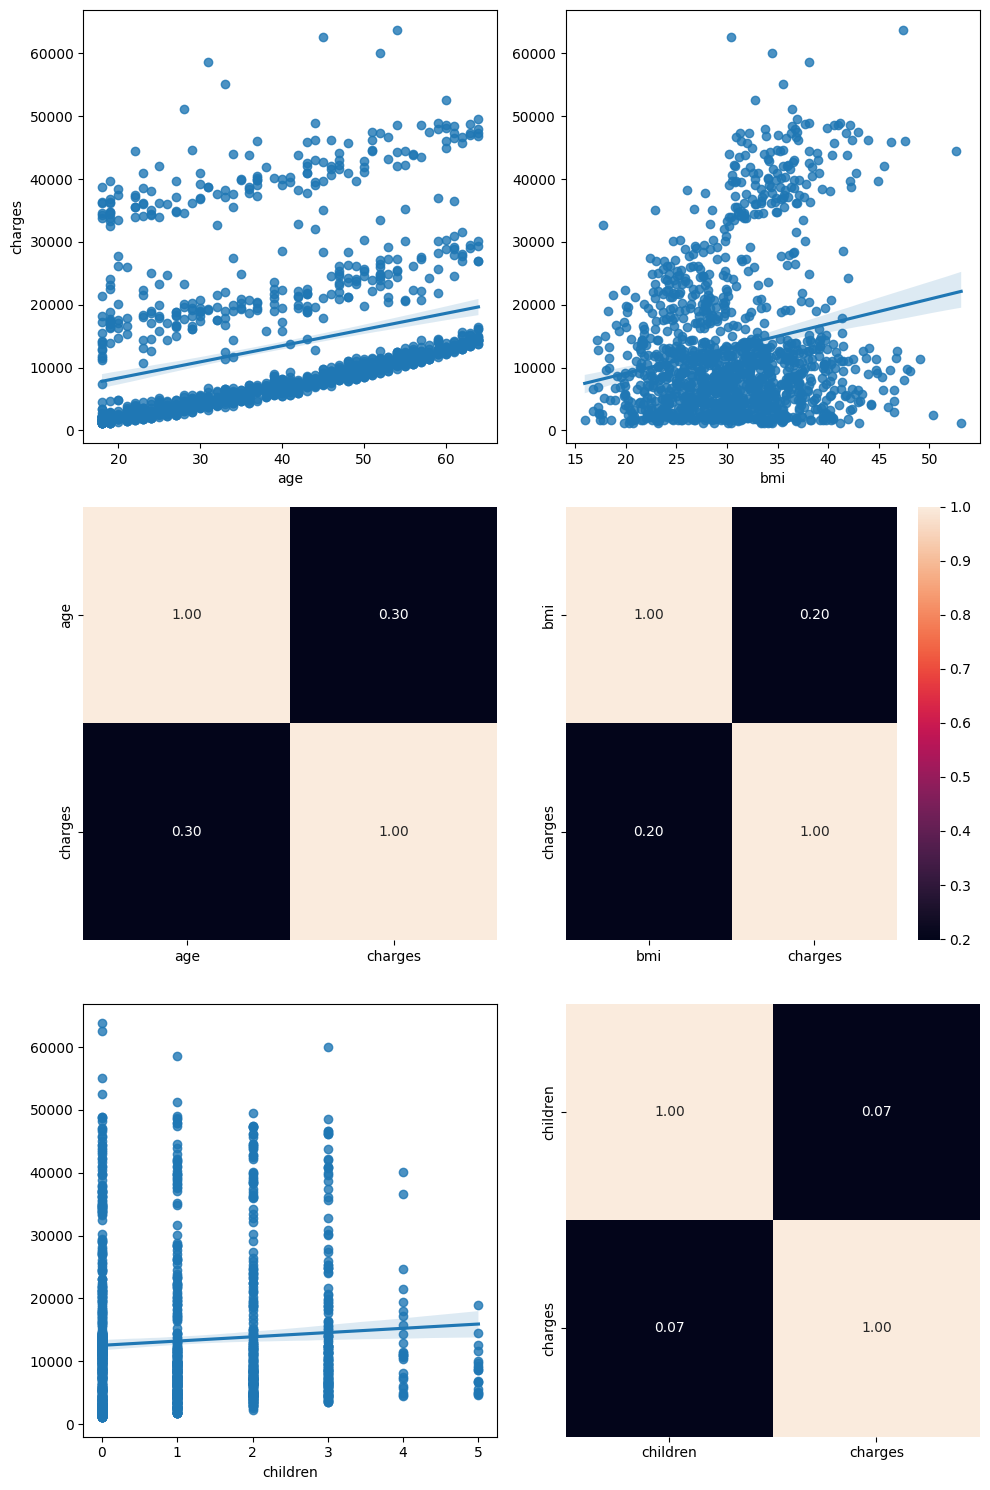

In [96]:
# plot all numerical against target "Charges"

fig, axis = plt.subplots(3, 2, figsize=(10, 15))

# Create scatter plots and heatmaps for the numerical features against "Charges"
sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="charges")
sns.heatmap(total_data[["age", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=total_data, x="bmi", y="charges").set(ylabel=None)
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.regplot(ax=axis[2, 0], data=total_data, x="children", y="charges").set(ylabel=None)
sns.heatmap(total_data[["children", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()



#### Analysis:

1. **Age vs. Charges**:
   - Positive correlation (≈ 0.30): As age increases, insurance charges tend to increase.
   
2. **BMI vs. Charges**:
   - Positive correlation (≈ 0.20): Higher BMI values are associated with higher insurance charges.
   
3. **Number of Children vs. Charges**:
   - Weak correlation ( ≈ 0.07): The number of children does not show a significant correlation with insurance charges.
   

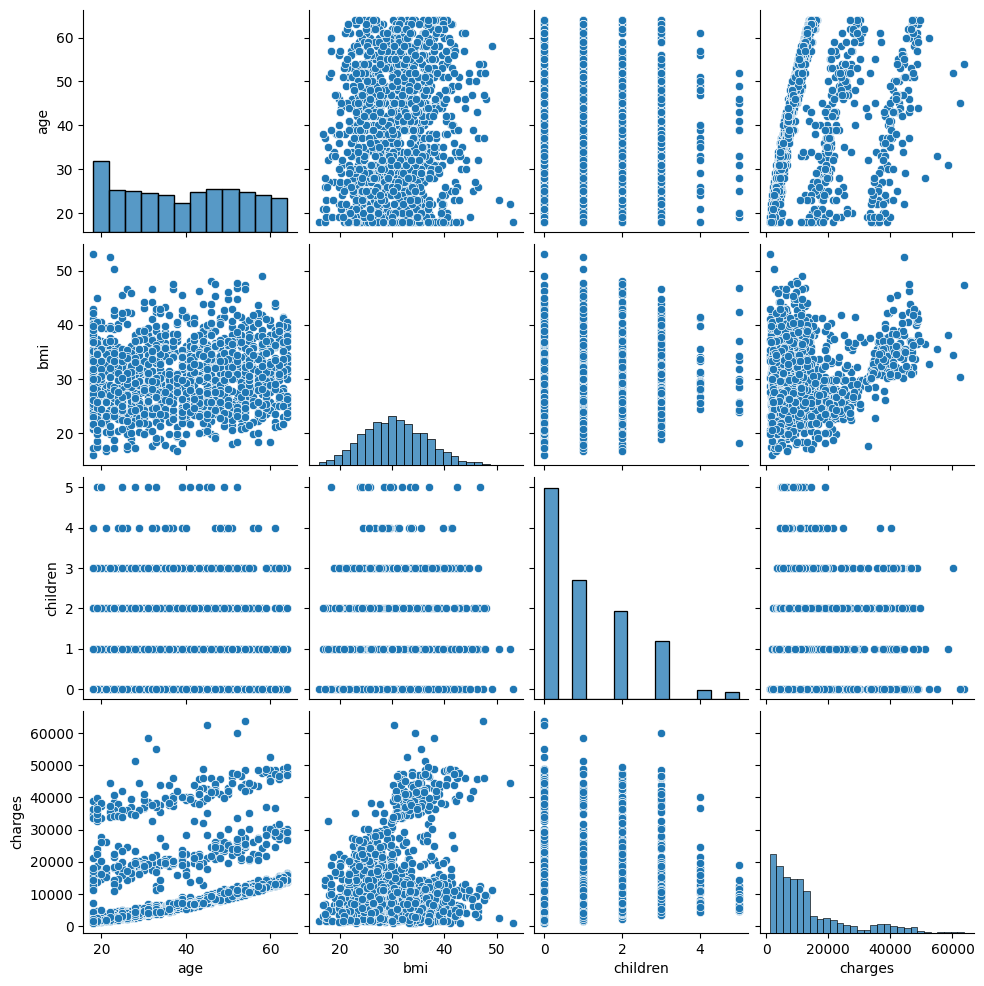

In [97]:
sns.pairplot(data = total_data[numerical_features])

<Axes: >

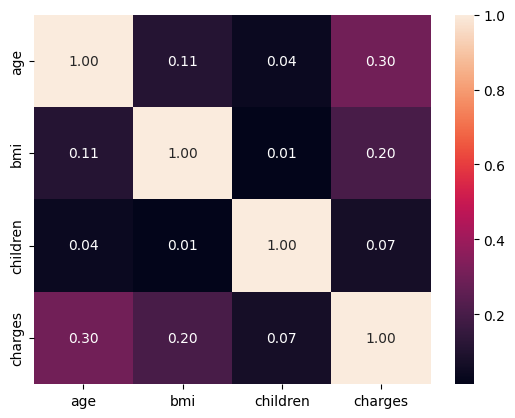

In [98]:
sns.heatmap(total_data[numerical_features].corr(), annot = True, fmt = ".2f")

#### Categorical - Target (Charges)

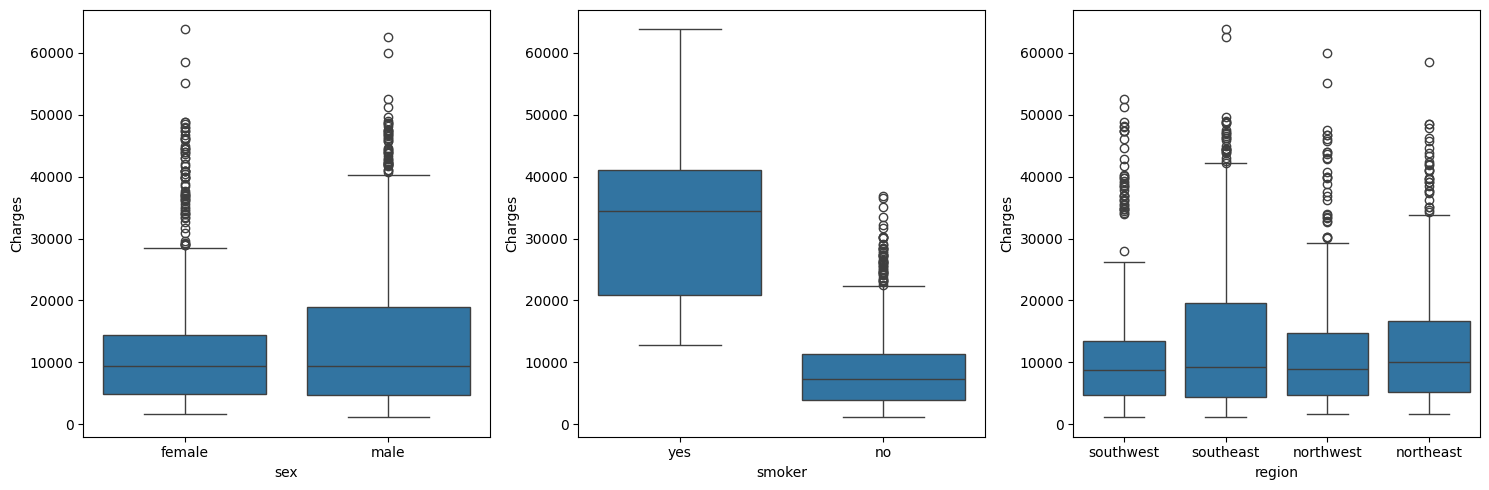

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot for 'sex' against 'charges'
sns.boxplot(ax=axes[0], data=total_data, x='sex', y='charges')
axes[0].set_ylabel('Charges')

# Boxplot for 'smoker' against 'charges'
sns.boxplot(ax=axes[1], data=total_data, x='smoker', y='charges')
axes[1].set_ylabel('Charges')

# Boxplot for 'region' against 'charges'
sns.boxplot(ax=axes[2], data=total_data, x='region', y='charges')
axes[2].set_ylabel('Charges')

plt.tight_layout()
plt.show()


In [100]:
# Factorize categorical features and create new numerical features
total_data['sex_n'], _ = pd.factorize(total_data['sex'])
total_data['smoker_n'], _ = pd.factorize(total_data['smoker'])
total_data['region_n'], _ = pd.factorize(total_data['region'])

categorical_features = ['sex_n', 'smoker_n', 'region_n']

In [101]:
total_data = total_data.drop(['sex', 'smoker', 'region'], axis=1)
total_data.head()

,age,bmi,children,charges,sex_n,smoker_n,region_n
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2


<Axes: >

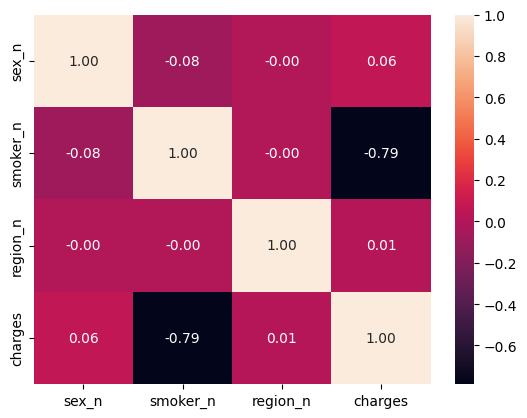

In [102]:
sns.heatmap(total_data[categorical_features + ['charges']].corr(), annot = True, fmt = ".2f")

#### Analysis (box plot and heat map):

- Smoker: Strong negative correlation (-0.79) between smoker and Insurance premium cost, insurance goes up cosistently if youre a smoker.
- Region: Variations in the median charges among regions may suggest geographical differences in insurance costs. Presence of outliers provides insights into the regional disparities in insurance charges.

#### Numerical - Categorical

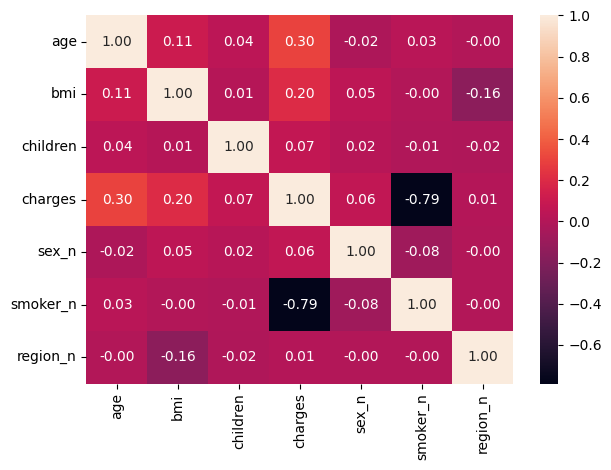

In [103]:
sns.heatmap(total_data[numerical_features + categorical_features].corr(), annot = True, fmt = ".2f")
plt.tight_layout()

#### Outlier Analysis

In [104]:
total_data.describe().loc[['mean', 'min', '25%', '75%', 'max']]

,age,bmi,children,charges,sex_n,smoker_n,region_n
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


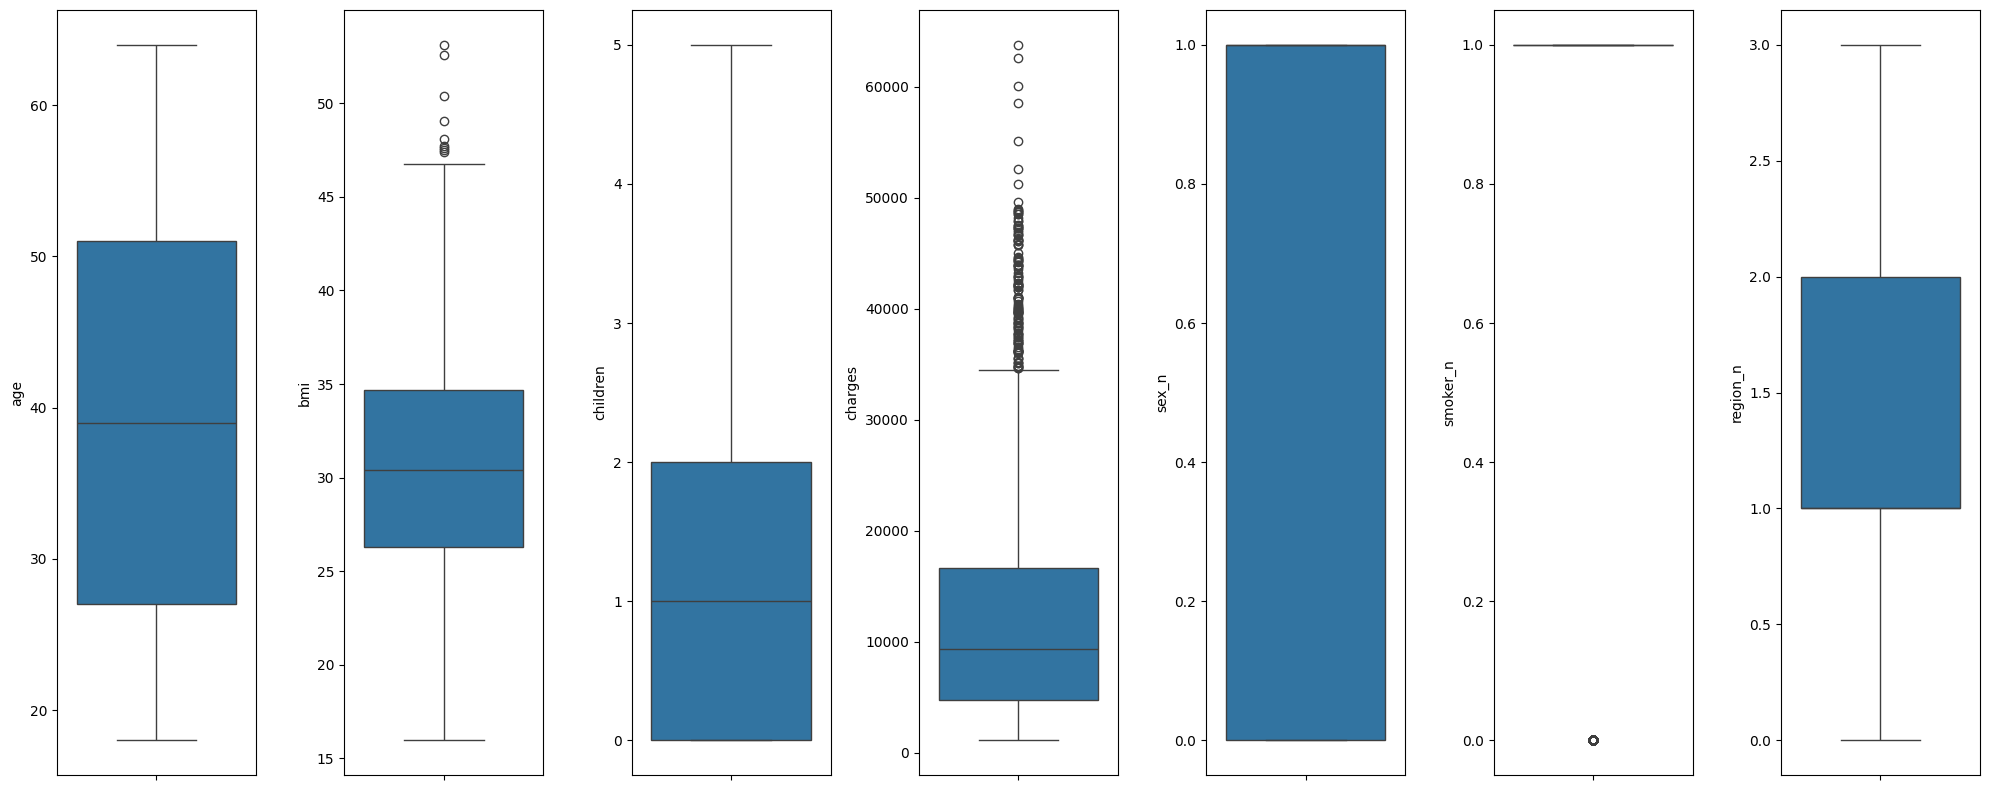

In [105]:

# Set figure DPI
plt.rcParams['figure.dpi'] = 100

fig, axis = plt.subplots(1, 7, figsize=(20, 8))

# Create boxplots for each feature
sns.boxplot(ax=axis[0], data=total_data, y="age")
sns.boxplot(ax=axis[1], data=total_data, y="bmi")
sns.boxplot(ax=axis[2], data=total_data, y="children")
sns.boxplot(ax=axis[3], data=total_data, y="charges")
sns.boxplot(ax=axis[4], data=total_data, y="sex_n")
sns.boxplot(ax=axis[5], data=total_data, y="smoker_n")
sns.boxplot(ax=axis[6], data=total_data, y="region_n")

plt.tight_layout()

plt.show()


Analyisis:
Charges seems to have a lot of outliers, we shall investigate further for any valuable insights before removing

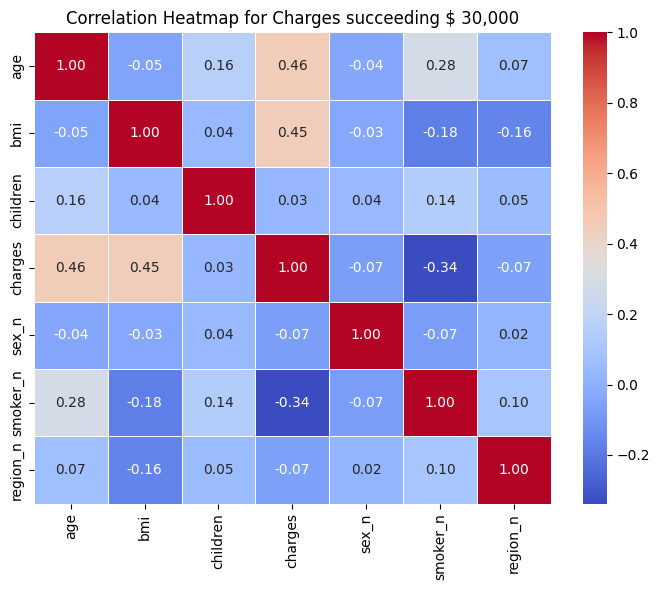

In [106]:

# Filter the data where charges are 30,000 and up
filtered_data = total_data[total_data['charges'] >= 30000]

# Create a heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(filtered_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Charges succeeding $ 30,000')
plt.tight_layout()
plt.show()


Analysis:
- These correlations suggest that age and BMI, have a lot of impact on medical insurance charges. Older individuals, those with higher BMI, tend to incur higher medical insurance charges, so much so that it diminishes the importance of  a previously strong smoker correlation.
- Conclusion: outliers worth keeping as they give valuable insight.


### Data Split and Scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = total_data.drop("charges", axis=1)
y = total_data["charges"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
# Scale the features separately for training and testing sets
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Feature Selection

In [109]:
from sklearn.feature_selection import SelectKBest, f_regression
# Perform feature selection on the scaled training set
selection_model = SelectKBest(f_regression, k=5)
selection_model.fit(X_train_scaled, y_train)

# Get the selected columns
selected_columns = X.columns[selection_model.get_support()]

# Transform the training and testing sets based on the selected features
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns=selected_columns)

In [110]:
X_train_sel.head()

,age,bmi,children,sex_n,smoker_n
0,0.108696,0.230024,0.0,1.0,1.0
1,0.065217,0.263250,0.4,1.0,1.0
2,0.739130,0.580172,0.4,0.0,1.0
3,0.978261,0.686306,0.0,1.0,1.0
4,0.630435,0.286252,0.4,0.0,1.0


In [111]:

# Add the target variable back to the selected datasets
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values

In [112]:
# Save the selected datasets to CSV files
X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)

# Display the first few rows of the selected training set
X_train_sel.head()

,age,bmi,children,sex_n,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,1.0,2396.09590
1,0.065217,0.263250,0.4,1.0,1.0,3279.86855
2,0.739130,0.580172,0.4,0.0,1.0,33471.97189
3,0.978261,0.686306,0.0,1.0,1.0,13405.39030
4,0.630435,0.286252,0.4,0.0,1.0,9715.84100


### Linear Regression Model

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the model
model = LinearRegression()

In [114]:
# Train the model using the training set with the selected features
model.fit(X_train_sel, y_train)

LinearRegression()

In [115]:
# Use the model to make predictions using the test set with the selected features
y_pred = model.predict(X_test_sel)

# Compare the model's predictions with the actual values of `y_test`
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 4.668323419725576e-23


In [116]:
from sklearn.metrics import r2_score

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 1.0
